In [1]:
#. A program for portfolio optimiaztion using the efficent frontier

In [2]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Get stock symbols
assets = ['AAPL', 'ALLT', 'NFLX', 'AMZN', 'GOOG']

In [4]:
#Assign weights to the stocks
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [5]:
#Get stock/Portfolio starting date
stockStartDate = '2015-12-12'

In [6]:
#Get stock end date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-12-12'

In [7]:
#Create a dataframe to store the adjusted close price of stocks
df = pd.DataFrame()

#Store the adjusted close price of the stock into the df
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start =stockStartDate, end = today)['Adj Close']

df

,AAPL,ALLT,NFLX,AMZN,GOOG
Date,,,,,
2015-12-14,25.840809,5.40,120.669998,657.909973,747.770020
2015-12-15,25.383627,5.56,118.599998,658.640015,743.400024
2015-12-16,25.578905,5.90,122.639999,675.770020,758.090027
2015-12-17,25.036730,5.82,122.510002,670.650024,749.429993
2015-12-18,24.359007,5.83,118.019997,664.140015,739.309998
...,...,...,...,...,...
2020-12-07,123.750000,10.14,515.780029,3158.000000,1819.479980
2020-12-08,124.379997,10.33,512.659973,3177.290039,1818.550049
2020-12-09,121.779999,10.09,493.600006,3104.199951,1784.130005


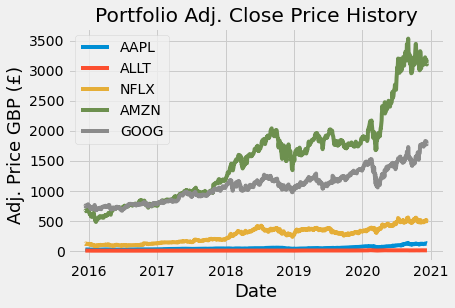

In [8]:
# Visualize Portfolio
title = 'Portfolio Adj. Close Price History'

# Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)
    
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Price GBP (£)', fontsize =18)
plt.legend(my_stocks.columns.values, loc= 'upper left')

In [9]:
#Show daily simple returns
returns = df.pct_change()
returns


,AAPL,ALLT,NFLX,AMZN,GOOG
Date,,,,,
2015-12-14,NaN,NaN,NaN,NaN,NaN
2015-12-15,-0.017692,0.029630,-0.017154,0.001110,-0.005844
2015-12-16,0.007693,0.061151,0.034064,0.026008,0.019761
2015-12-17,-0.021196,-0.013559,-0.001060,-0.007577,-0.011423
2015-12-18,-0.027069,0.001718,-0.036650,-0.009707,-0.013504
...,...,...,...,...,...
2020-12-07,0.012270,-0.007828,0.035059,-0.001448,-0.004655
2020-12-08,0.005091,0.018738,-0.006049,0.006108,-0.000511
2020-12-09,-0.020904,-0.023233,-0.037179,-0.023004,-0.018927


In [10]:
#Create and show annualized covariance matrix (directional relationship between asset prices)
#Number of trading days in this year = 252
cov_matrix_annual = returns.cov()*252  
cov_matrix_annual

,AAPL,ALLT,NFLX,AMZN,GOOG
AAPL,0.090716,0.038968,0.056284,0.054585,0.052247
ALLT,0.038968,0.149031,0.029486,0.030133,0.033020
NFLX,0.056284,0.029486,0.165015,0.071991,0.055298
AMZN,0.054585,0.030133,0.071991,0.092610,0.053795
GOOG,0.052247,0.033020,0.055298,0.053795,0.069744


In [11]:
#Calculate portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06074906939058958

In [12]:
#Calculate the portfolio volatility : standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.24647326303392336

In [13]:
#annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights*252)
portfolioSimpleAnnualReturn

0.2980376295029228

In [14]:
#Show expected annual return, volatility (risk) and variance
percent_var = str(round(port_variance, 2)*100) +'%'
percent_vols = str(round(port_volatility, 2)*100)+ '%'
percent_ret= str(round(portfolioSimpleAnnualReturn, 2)*100) + '%'

print('Expected annual return' + percent_ret)
print('Annual volatility / risk: '+percent_vols)
print('Annual variance:' +percent_var)

Expected annual return30.0%
Annual volatility / risk: 25.0%
Annual variance:6.0%


In [15]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [19]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [20]:
#Portfolio Optimization

#Calculate the expected returns and the annualised sample covariance matrix of an asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#optimize for max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('AAPL', 0.50743), ('ALLT', 0.0), ('NFLX', 0.01787), ('AMZN', 0.4747), ('GOOG', 0.0)])
Expected annual return: 36.5%
Annual volatility: 27.0%
Sharpe Ratio: 1.28


(0.3649579303497149, 0.26984852027167966, 1.278339158585773)

In [24]:
#Get discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'AAPL': 63, 'NFLX': 1, 'AMZN': 2}
Funds remaining: $552.11
